In [16]:
# 1. 필요한 라이브러리 임포트
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq


📂 air.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


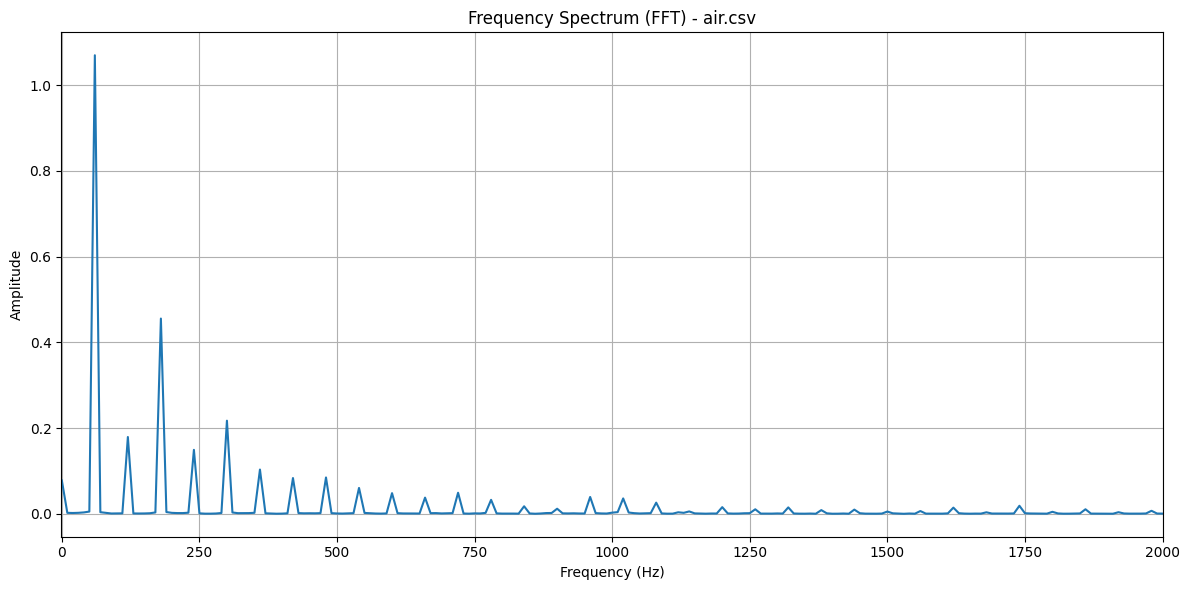


📂 hand+metal.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


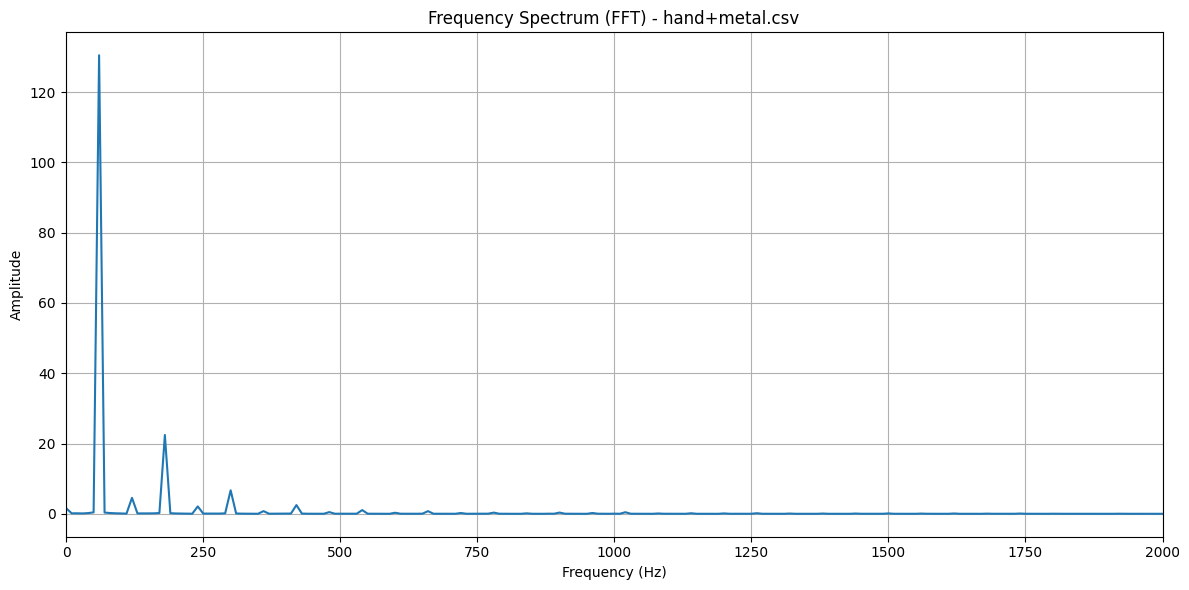


📂 hand.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


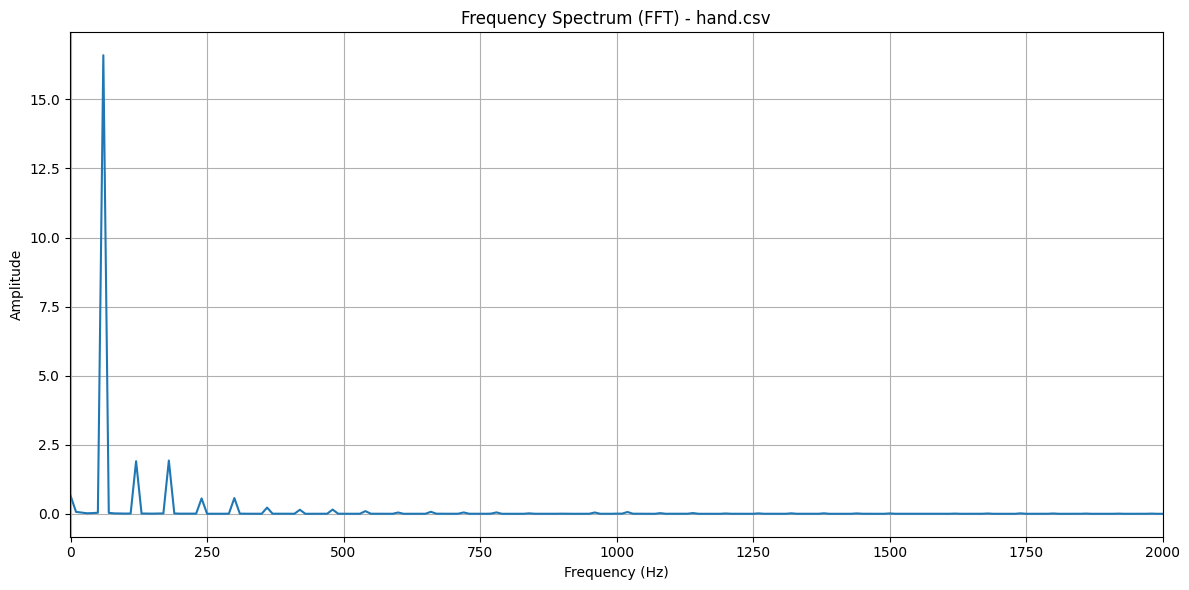


📂 metal.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


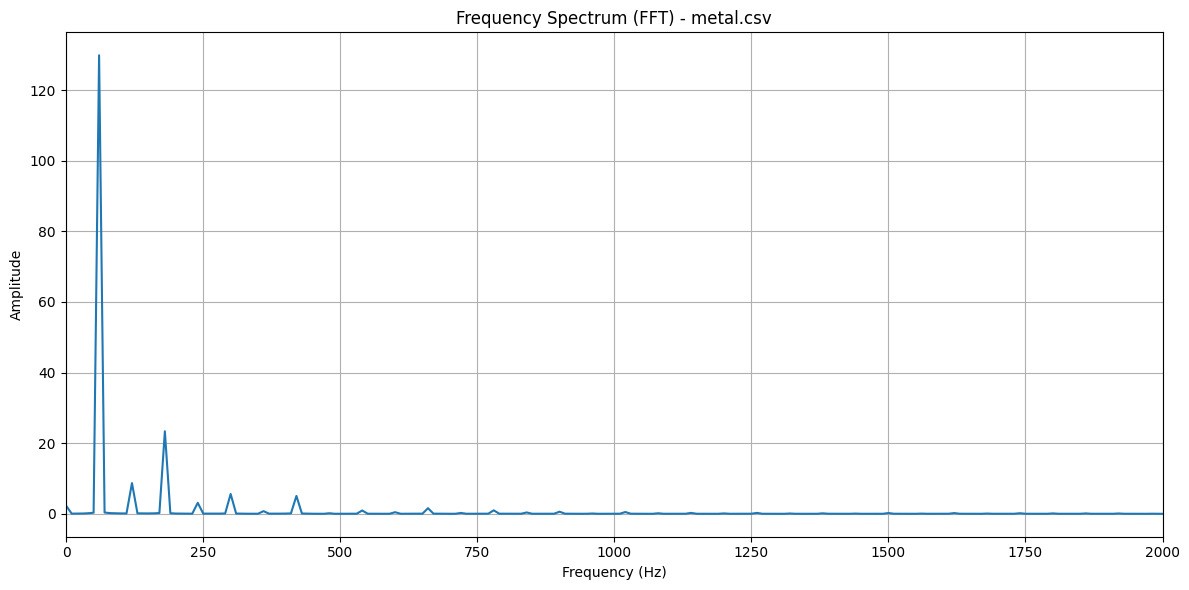


📂 plastic.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


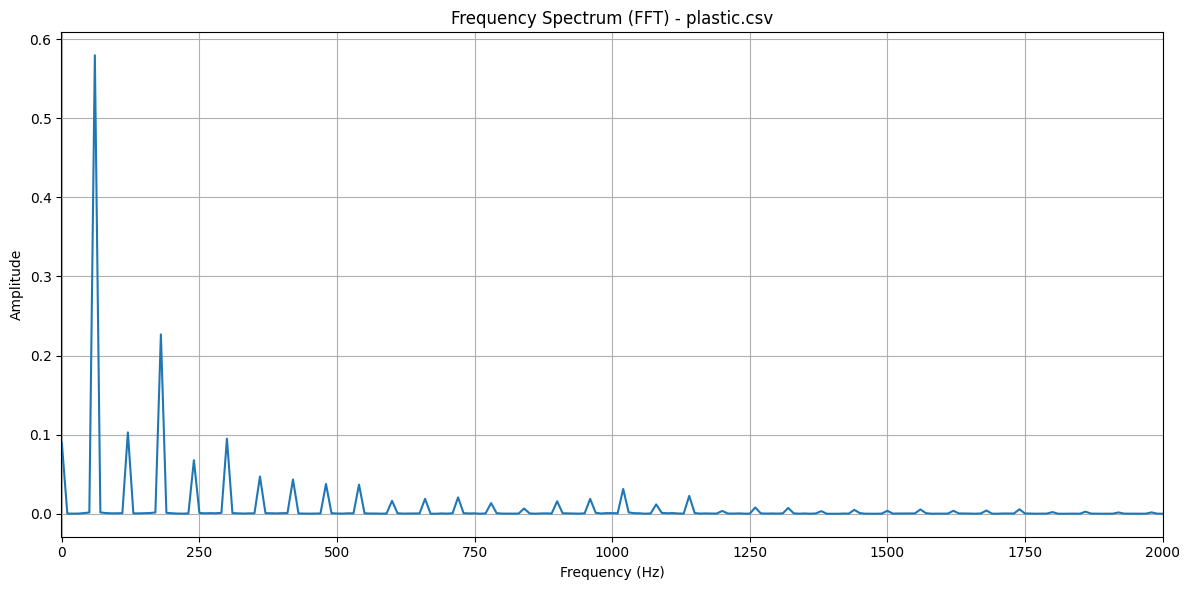


📂 water.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


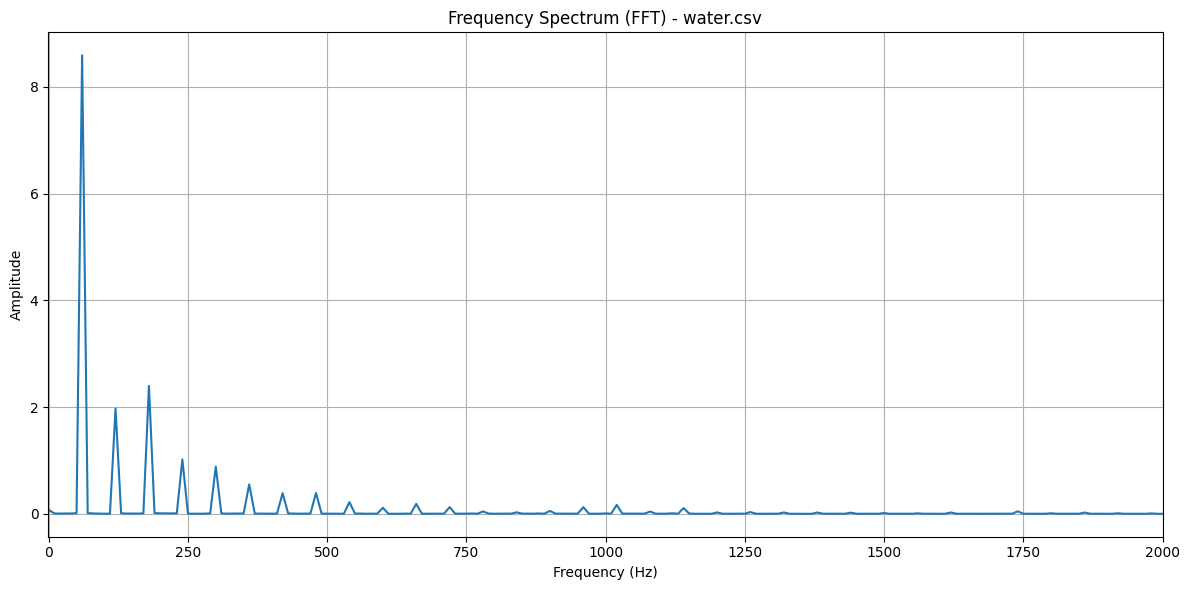


📂 wire_air.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


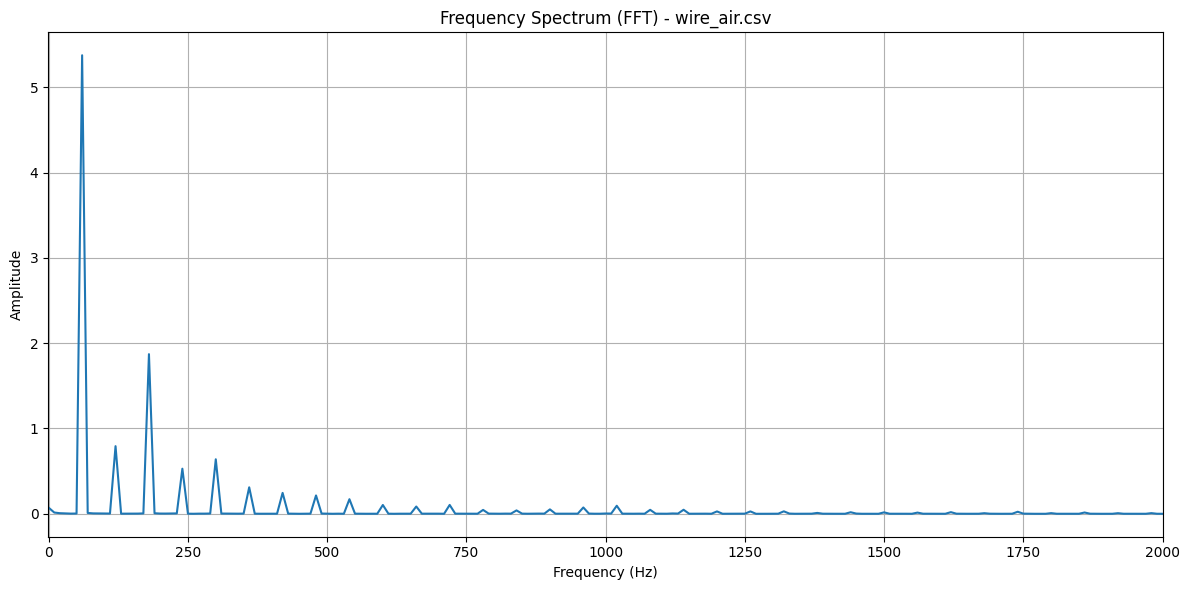


📂 wire_hand+metal.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


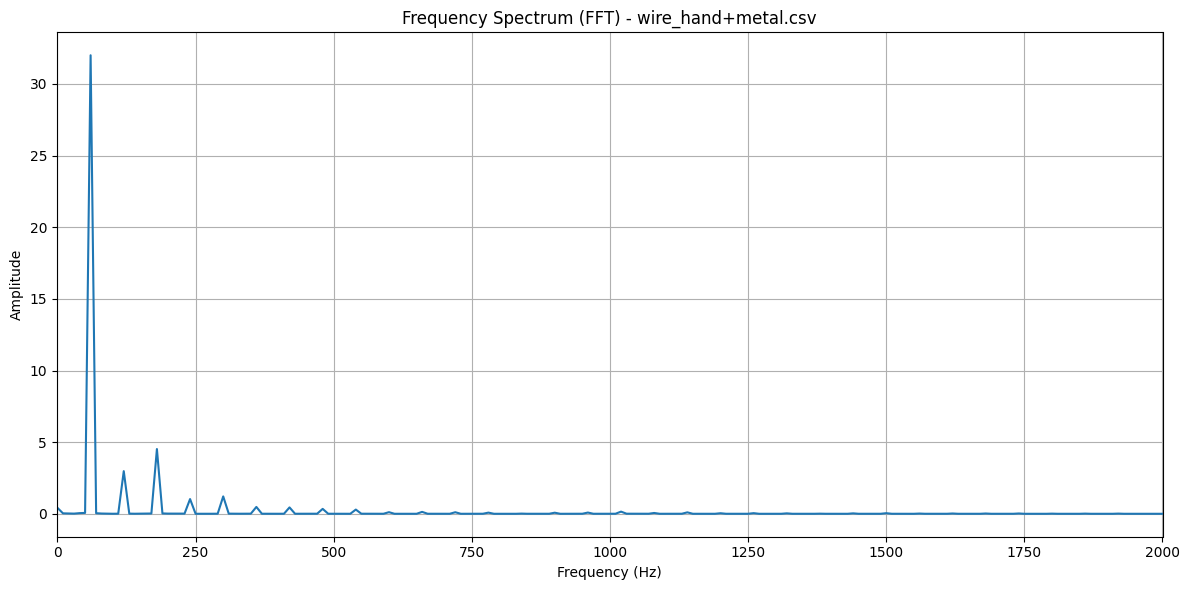


📂 wire_hand.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


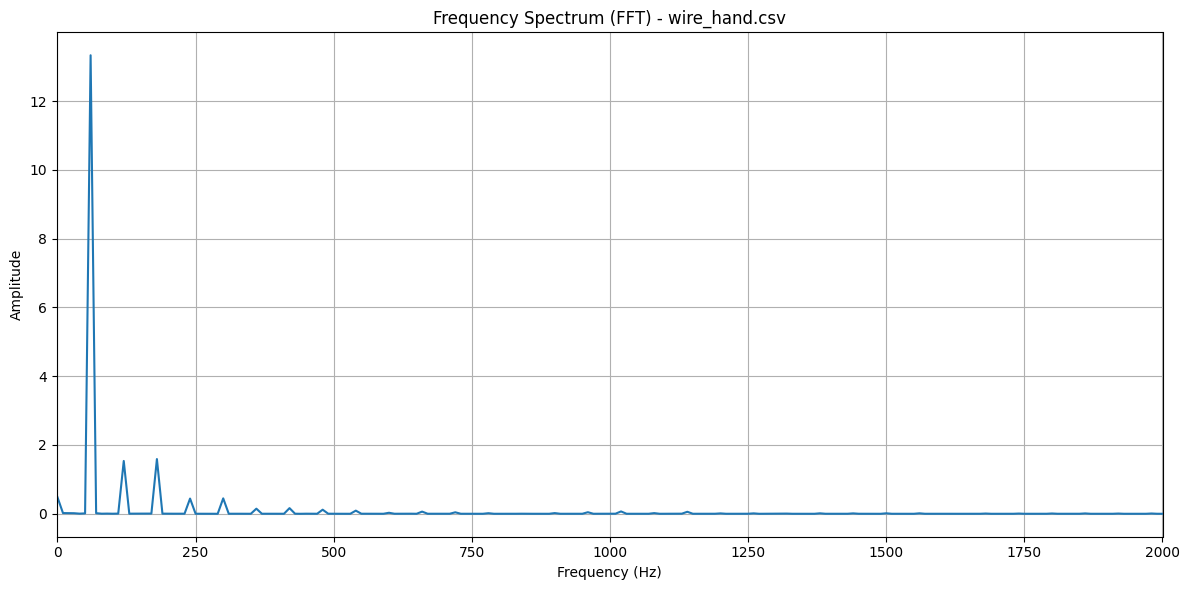


📂 wire_metal.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


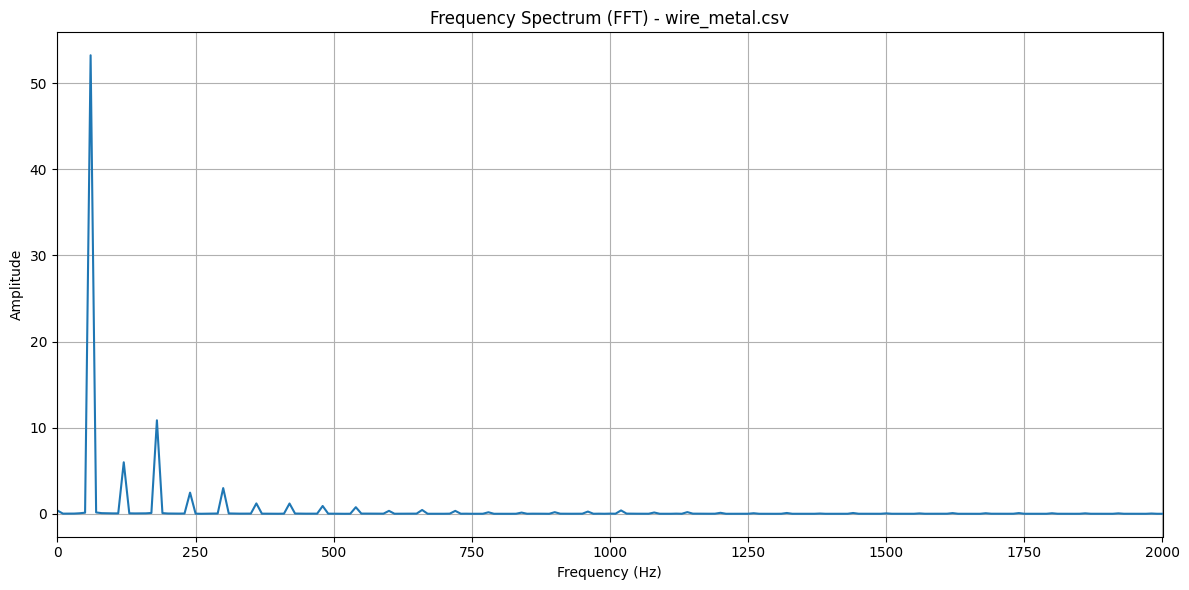


📂 wire_metal2.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


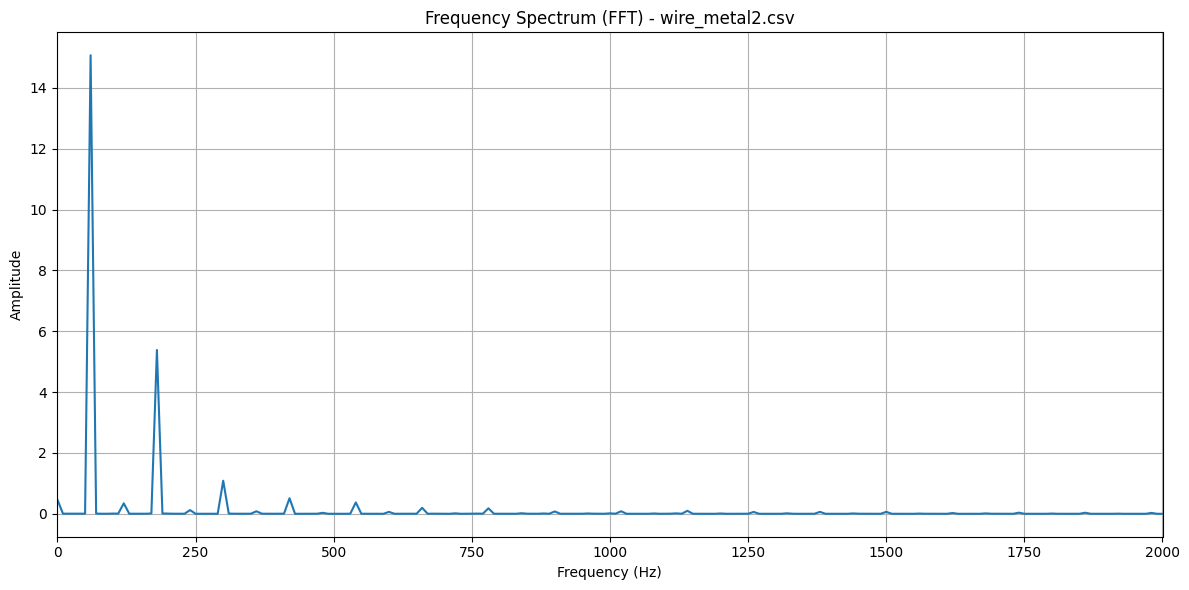


📂 wire_metal3.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


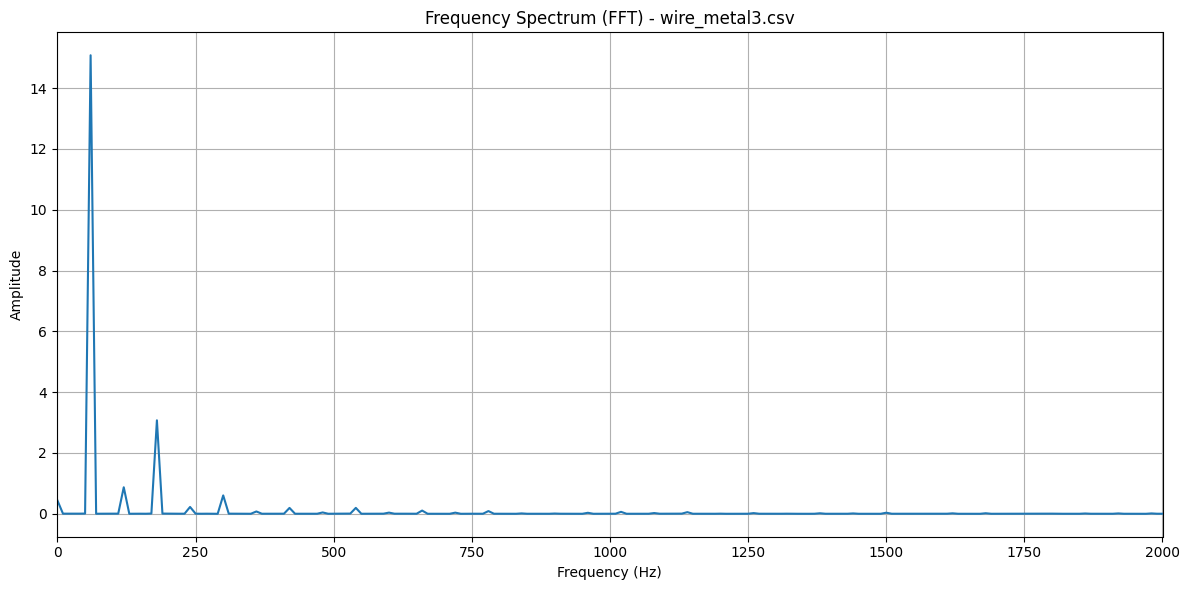


📂 wire_metal4.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


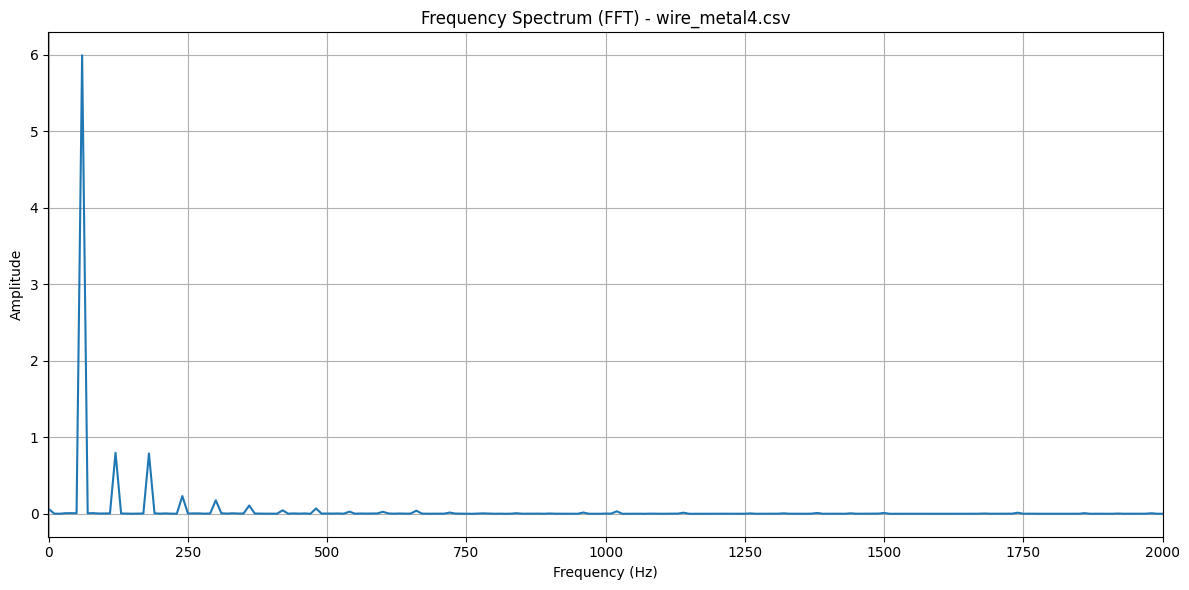


📂 wire_plastic.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


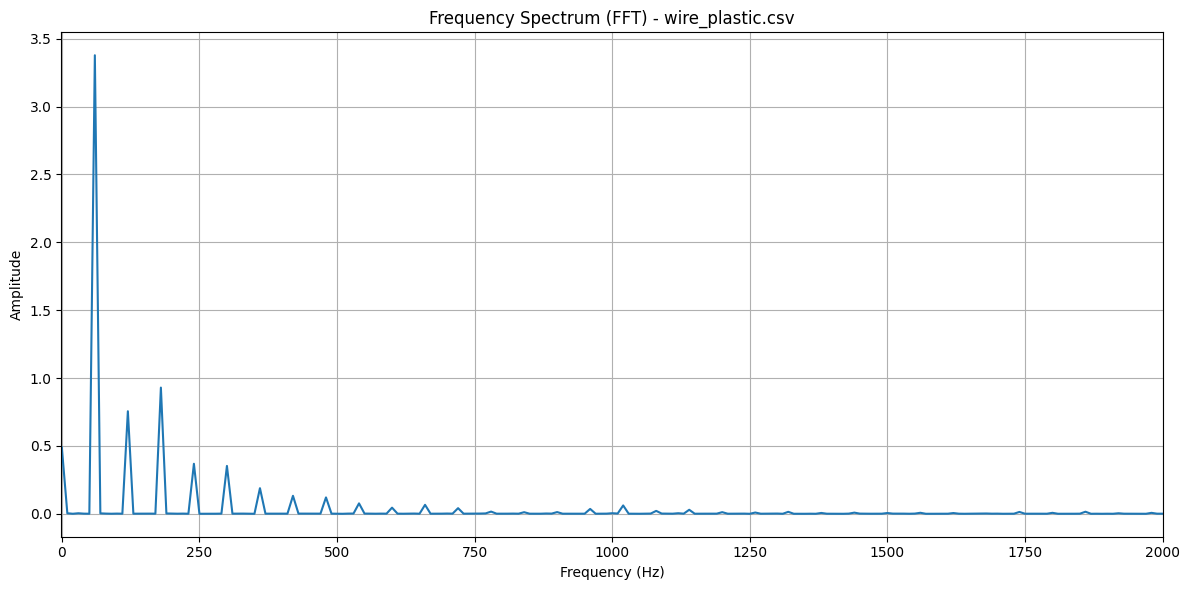


📂 wire_water.csv
샘플 개수: 99999, 샘플링 간격: 0.000001초, 샘플링 주파수: 1000000.00Hz


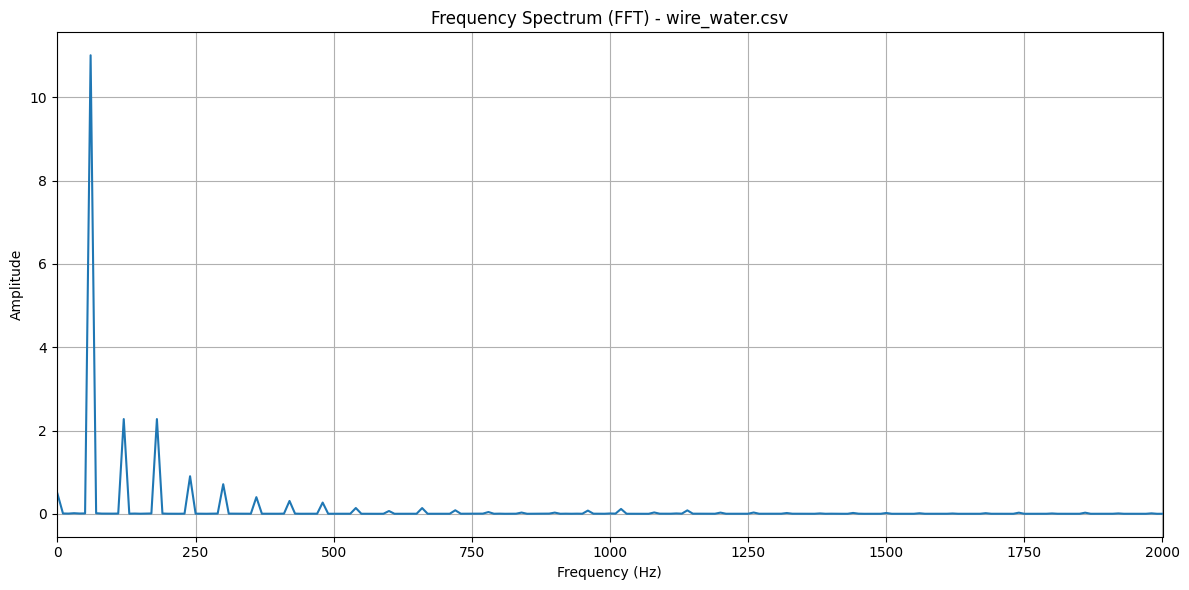

In [ ]:
# 폴더 경로 설정
folder_path = r"C:\Users\GCU\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\4. Secret Noise Analyzing project\1. 실험자료\250710_6037호\csv파일"

# CSV 파일 목록 가져오기
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# -------------------------------
# 파일별 FFT 분석 루프
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        # 1. CSV 데이터 로드
        df = pd.read_csv(file_path)

        # 2. 시간 및 신호 추출
        time = df.iloc[:, 0].values
        signal = df.iloc[:, 1].values

        # 3. 샘플링 정보 계산
        N = len(signal)
        T = time[1] - time[0]  # 고정 샘플링 간격
        fs = 1 / T

        print(f"\n {file_name}")
        print(f"샘플 개수: {N}, 샘플링 간격: {T:.6f}초, 샘플링 주파수: {fs:.2f}Hz")

        # 4. FFT 수행
        yf = fft(signal)
        xf = fftfreq(N, T)[:N//2]  # 양수 주파수만

        # 5. 그래프 출력
        plt.figure(figsize=(12, 6))
        plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
        plt.title(f"Frequency Spectrum (FFT) - {file_name}")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.xlim(-1, 2000)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ {file_name} 처리 중 오류 발생: {e}")
